# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [3]:
# The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010.
# Many features were collected and out of the over 79k samples about 8% of them are positive, 
# which makes this a very good quality dataset for classification models.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import numpy as np
import importlib
import functions
importlib.reload(functions)

<module 'functions' from '/home/elmunoz42/aimlbootcamp/aimlbootcamp/practical-assignement-3/functions.py'>

In [3]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Create a copy of the dataframe to avoid modifying the original
df_processed = df.copy()

# Transform binary yes/no features
binary_features = ['default', 'housing', 'loan', 'y']
for feature in binary_features:
    df_processed[feature] = df_processed[feature].map({'yes': 1, 'no': 0, 'unknown': np.nan})

# Check the result
df_processed[binary_features].head()

,default,housing,loan,y
0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


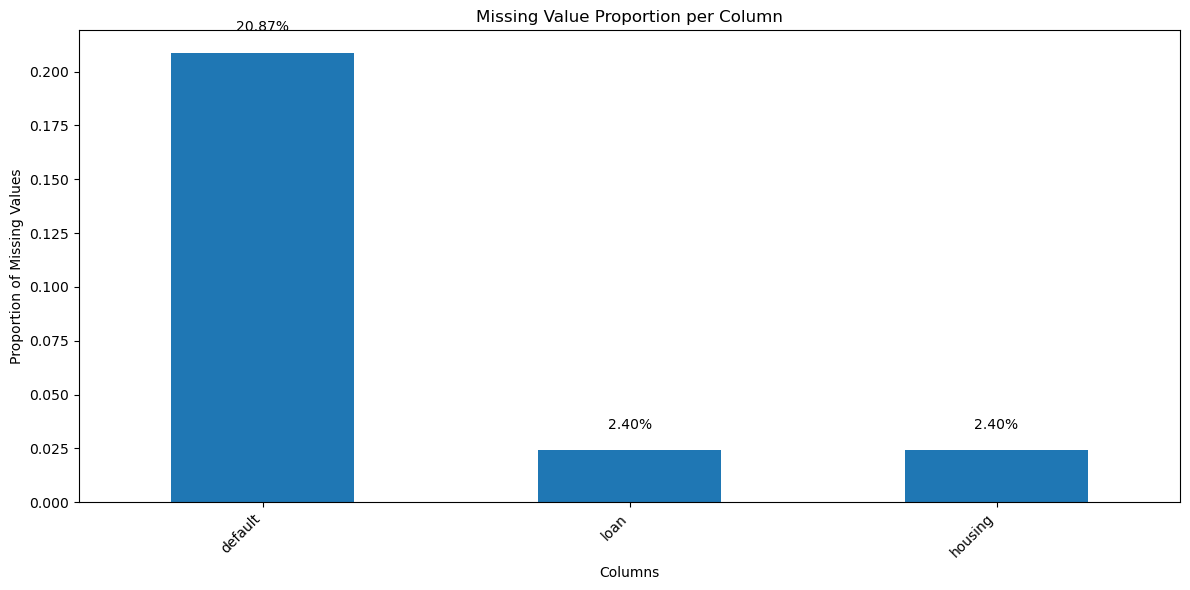

Missing value analysis saved to images/fig1.jpg
Total columns with missing values: 3
Column with most missing values: default (20.87%)


In [8]:
# Confirm that there are no missing values. Plotting function From functions.py file...
# Call the function with custom NA values
functions.plot_dataframe_missing_values(df_processed, 'images/fig1.jpg')

# Statistical Description 

## Using describe() function

In [9]:
df_processed.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,32591.000000,40198.000000,40198.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000092,0.536743,0.155431,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.009594,0.498654,0.362319,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## EXPERIMENT: Using Claude API Function Against Column Descriptions and Pandas describe() Output

In [17]:
# CUstom function imported from the functions.py file
## ADD YOUR OWN API KEY
# claude_key = ''
model = 'claude-3-opus-20240229'
custom_prompt = """
        You are an expert data analyst. Based on the dataset statistics provided, give me a concise, 
        human-readable interpretation of the key characteristics of this dataset. Focus on:
        
        1. The typical values and ranges for numerical columns
        2. Ignore the categorical features since you don't have data for these. DONT DESCRIBE FEATURES FOR WHICH YOU DON'T HAVE NUMBERS.
        3. Any potential issues with the data (e.g., missing values, outliers)
        4. Any interesting patterns or insights
        
        Format your response as bullet points that are easy to read and understand.
        Make your insights actionable for further data analysis and classification model development.
        """

## AFTER ADDING YOUR API KEY UNCOMMENT CODE TO RUN
# interpretation = functions.describe_dataset_with_claude(df_processed, claude_key, model='claude-3-opus-20240229', 
#                                 version='2023-06-01', custom_prompt=custom_prompt, 
#                                 column_description='', column_info_file='custom_info.txt')
# # # output
# print(interpretation)

# OUTPUT ALSO SAVED TO THIS FILE FOR REVIEW: claude-statistical-analysis.txt

Here are the key characteristics of the dataset:

- The age of individuals ranges from 17 to 98, with a mean of 40 and standard deviation of 10.4. The middle 50% of ages fall between 32 and 47.

- The duration of the last contact ranges from 0 to 4918 seconds, with a mean of 258 seconds and high variability (std dev of 259). The middle 50% of durations are between 102 and 319 seconds. 

- The number of contacts performed during this campaign for each client ranges from 1 to 56, but on average is only 2.6 contacts with 50% having 2 or fewer contacts.

- For the previous campaign, pdays (days since last contact) is 999 for the vast majority of clients, indicating no recent contact. The previous column shows 83% of clients had 0 contacts before this campaign.

- Macroeconomic indicators like employment variation rate, consumer price index, consumer confidence index, and euribor3m rate show fairly narrow ranges of values.

- There are missing values in the default, housing and loan columns

## Claude Model Response Evaluation:

To run this yourself you'll need an API key https://console.anthropic.com/

The above technique is experimental. When I ran it at first it was hallucinating for features it didn't have any data for thus the all caps prompt "DONT DESCRIBE FEATURES FOR WHICH YOU DON'T HAVE NUMBERS." was necessary. That improved the result significantly. 

Please note that the response is slighly different each time it is run, and we have to corroborate any of its claims.

The experiment was helpful in identifying some issues. The sample output can also be reviewed in this file: claude-statistical-analysis.txt 


### _pdays_ Feature Has Hard Upper Limit Presumably Due to a Form Limitation

It does provide some further avenues for exploration and data cleaning. On a different pass it had noticed that the pdays column had a mode for the number 999 which is also the max value. 

The dataset had described:

"pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)" 

This is not entirely true since according to the data there have been over 4000 customers that had been reached out to at least once and also have the value set to 999 

In [18]:
df_processed['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [19]:
df_processed.query("pdays == 999")['previous'].value_counts()

0    35563
1     3696
2      349
3       50
4       12
5        2
6        1
Name: previous, dtype: int64

Based on the query to see the value counts this seems to be a limitation of the intake form. While the majority of instances of 999 pdays is people that haven't been reached out to some of them are simply people that presumably hadn't been reached out to in a long time. Thus it does indeed seem to be an artifact in the data that needs to be accounted for. More on this later.

### Further Review of Missing, Unkown and 999 Values affecting _pdays, default, housing and loan_ Features

Our experimental Claude API statistical analysis claimed these features had missing values and other issues.

In [20]:
df_processed['default'].value_counts(dropna=False)

0.0    32588
NaN     8597
1.0        3
Name: default, dtype: int64

In [21]:
df_processed['housing'].value_counts(dropna=False)

1.0    21576
0.0    18622
NaN      990
Name: housing, dtype: int64

In [22]:
df_processed['loan'].value_counts(dropna=False)

0.0    33950
1.0     6248
NaN      990
Name: loan, dtype: int64

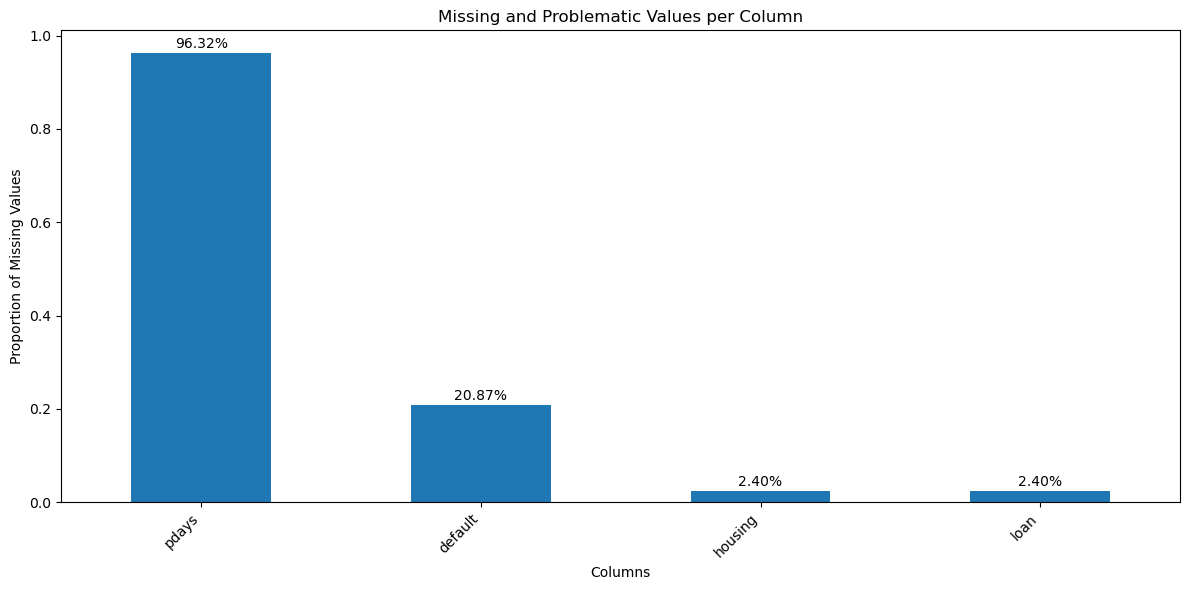

Missing value analysis saved to images/fig1B.jpg
Total columns with missing values: 4
Column with most missing values: pdays (96.32%)


In [23]:
# Review 999 or unknown entries in addition to other missing values. Plotting function From functions.py file...
# Define custom missing value indicators
custom_na = {
    'pdays': [999],  # 999 in pdays means "client was not previously contacted"
    'default': ['unknown'],
    'housing': ['unknown'],
    'loan': ['unknown']
}

# Call the function with custom NA values
functions.plot_dataframe_missing_values(df_processed, 'images/fig1B.jpg', custom_na_values=custom_na, custom_title='Missing and Problematic Values per Column')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [24]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### The Busines Understanding

The Portuguese bank is seeking to increase the number of long-term deposit subscriptions through telemarketing campaigns. Since marketing efforts are costly and can have negative effects if applied indiscriminately, the bank needs to optimize its approach. The business objective is to develop predictive models that can identify which customers are most likely to subscribe to term deposits, thereby maximizing return on investment and minimizing unnecessary contacts.
By comparing different classification models using the CRISP-DM methodology, we aim to determine which model provides the most accurate predictions. The final deliverable will include gain and lift visualization charts that will enable the bank's marketing team to identify the optimal cohort of prospects to target, allowing them to focus their efforts on customers with the highest probability of conversion while reducing overall campaign costs.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

# The pdays Feature Transformationon

Since over 90% of samples have _the p_days feature at the artificial 999 limit, we've created a new ordered categorical feature called touch_point. After experimenting with different breakpoints, I noticed a significant gap between values around 250 and the 999 value, with no values in between.

Additionally, in smaller numbers there's considerable variation that might reflect the [Recency Effect](https://thedecisionlab.com/biases/recency-effect). For example, if someone contacted me yesterday and calls again today, I might perceive this as intrusive. However, contact after a 90-day gap feels considerably different. To capture these psychological effects, we've distributed the data using Fib inspiredonacci se ofquence breakpoint ranges.

Furthermore, when the *previous* column equals 0, we've marked the value as *Never*. While we could have used a simple mathematical formula, due to issues with the data collection process, we've opted for categorical encoding  This new configuration makes it clear that 999 is not a specific number but instead 999-and-over or never. This engineered feature solves multiple issues at once.instead.


In [6]:
def create_fibonacci_touch_point_simplified(df):
    """
    Create a categorical touch_point feature based on Fibonacci-like intervals
    with simplified categories for recent contacts.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing 'pdays' and 'previous' columns
    
    Returns:
    pandas.Series: New touch_point categorical feature
    """
    # Create a copy to avoid modifying the original dataframe
    touch_point = pd.Series(index=df.index, dtype='object')
    
    # Assign "Never" if previous=0 (regardless of pdays value)
    touch_point.loc[df['previous'] == 0] = 'Never'
    
    # Create mask for previously contacted customers
    mask = df['previous'] > 0
    
    # Special case for 999 and over
    touch_point.loc[mask & (df['pdays'] >= 999)] = '999-and-over'
    
    # Early days with simpler categories
    touch_point.loc[mask & (df['pdays'] == 0)] = 'Today'
    touch_point.loc[mask & (df['pdays'] == 1)] = '1-day'
    touch_point.loc[mask & (df['pdays'] == 2)] = '2-days'
    touch_point.loc[mask & (df['pdays'] == 3)] = '3-days'
    
    # Then use Fibonacci-like progression
    touch_point.loc[mask & (df['pdays'] >= 4) & (df['pdays'] <= 5)] = '4-to-5-days'
    touch_point.loc[mask & (df['pdays'] >= 6) & (df['pdays'] <= 8)] = '6-to-8-days'
    touch_point.loc[mask & (df['pdays'] >= 9) & (df['pdays'] <= 13)] = '9-to-13-days'
    touch_point.loc[mask & (df['pdays'] >= 14) & (df['pdays'] <= 21)] = '14-to-21-days'
    touch_point.loc[mask & (df['pdays'] >= 22) & (df['pdays'] <= 34)] = '22-to-34-days'
    touch_point.loc[mask & (df['pdays'] >= 35) & (df['pdays'] <= 55)] = '35-to-55-days'
    touch_point.loc[mask & (df['pdays'] >= 56) & (df['pdays'] <= 89)] = '56-to-89-days'
    touch_point.loc[mask & (df['pdays'] >= 90) & (df['pdays'] <= 144)] = '90-to-144-days'
    touch_point.loc[mask & (df['pdays'] >= 145) & (df['pdays'] <= 233)] = '145-to-233-days'
    touch_point.loc[mask & (df['pdays'] >= 234) & (df['pdays'] <= 377)] = '234-to-377-days'
    touch_point.loc[mask & (df['pdays'] >= 378) & (df['pdays'] <= 610)] = '378-to-610-days'
    touch_point.loc[mask & (df['pdays'] >= 611) & (df['pdays'] < 999)] = '611-to-998-days'
    
    # Create ordered categories list
    ordered_categories = [
        'Never', 
        '999-and-over',
        '611-to-998-days',
        '378-to-610-days',
        '234-to-377-days',
        '145-to-233-days',
        '90-to-144-days',
        '56-to-89-days',
        '35-to-55-days',
        '22-to-34-days',
        '14-to-21-days',
        '9-to-13-days',
        '6-to-8-days',
        '4-to-5-days',
        '3-days',
        '2-days',
        '1-day',
        'Today'
    ]
    
    # Remove any categories that don't appear in the data
    existing_categories = touch_point.unique()
    ordered_categories = [cat for cat in ordered_categories if cat in existing_categories]
    
    return pd.Categorical(touch_point, categories=ordered_categories, ordered=True)

# Apply the function to your processed dataframe
df_processed['touch_point'] = create_fibonacci_touch_point_simplified(df_processed)

# Print distribution of the new feature
print(df_processed['touch_point'].value_counts(dropna=False))
print("\nPercentage distribution:")
print(df_processed['touch_point'].value_counts(normalize=True) * 100)

Never            35563
999-and-over      4110
6-to-8-days        490
3-days             439
9-to-13-days       238
4-to-5-days        164
14-to-21-days       76
2-days              61
1-day               26
Today               15
22-to-34-days        6
Name: touch_point, dtype: int64

Percentage distribution:
Never            86.343110
999-and-over      9.978635
6-to-8-days       1.189667
3-days            1.065844
9-to-13-days      0.577838
4-to-5-days       0.398174
14-to-21-days     0.184520
2-days            0.148101
1-day             0.063125
Today             0.036418
22-to-34-days     0.014567
Name: touch_point, dtype: float64


# Removing Features from the DataFrame

Now that _pdays_ has been translated into _touch_point_ the feature can be removed. 

The _default_ feature only has 3 positive cases and a large amount of 20% of NaN values, as a result we will also remove this feature from the dataframe as it won't likely help with predictions.

In [7]:
df_prepared = df_processed.drop(['pdays', 'default'], axis=1)
df_prepared.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'touch_point'],
      dtype='object')


# Feature Processing

## Categorical Features (One-Hot Encoding)
The following categorical features will be processed using one-hot encoding:

```
job, marital, education, contact, month, day_of_week, poutcome
```

## Special Case: touch_point Feature (Ordinal Encoding)
The `touch_point` feature (derived from `pdays`) will be processed with ordinal encoding:

1. Create meaningful ordinal categories based on when the client was l. (e.g., > 90 days)

2. Assign increasing integers (e.g., 0 through 4)

## Numerical Features (Polynomial Feature Creation)
For numerical features like:
```
age, duration, campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
```

The pipeline will scale these features and generate polynomial features to captthe other transformations for categorical and numerical features.

## Feature Processing Pipeline

This default pipeline includes the categorical, ordinal and polynomial features. As a starting point we are choosing polynomial degree 2.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures

# Define column groups
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
ordinal_cols = ['touch_point']
numerical_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 
                 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Define ordinal categories for touch_point
touch_point_categories = [[
        'Never', 
        '999-and-over',
        '611-to-998-days',
        '378-to-610-days',
        '234-to-377-days',
        '145-to-233-days',
        '90-to-144-days',
        '56-to-89-days',
        '35-to-55-days',
        '22-to-34-days',
        '14-to-21-days',
        '9-to-13-days',
        '6-to-8-days',
        '4-to-5-days',
        '3-days',
        '2-days',
        '1-day',
        'Today'
    ]]
    

# Define default preprocessor (permutations of this will be used as needed)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('ord', OrdinalEncoder(categories=touch_point_categories), ordinal_cols),
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numerical_cols)
    ]
)


## Complete Pipeline Structure

This updated pipeline now properly includes the ordinal encoding for the `touch_point` feature while maintaining the other transformations for categorical and numerical features. Different polynomial degrees will be used as needed.

# Full pipeline example with classifier
```
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', YourChosenClassifier())  # Replace with actual classifier
])
```

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [28]:
# train_test_split?

In [9]:
from sklearn.model_selection import train_test_split
X = df_prepared.drop('y', axis=1)
y = df_prepared['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [10]:
# Import Libraries
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

In [11]:
%time dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_train_score = dummy_clf.score(X_train, y_train)
baseline_test_score = dummy_clf.score(X_test, y_test)

print(f"baseline_train_score: {baseline_train_score}")
print(f"baseline_test_score: {baseline_test_score}")

CPU times: user 1.86 ms, sys: 1.5 ms, total: 3.36 ms
Wall time: 2.42 ms
baseline_train_score: 0.8873458288821987
baseline_test_score: 0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [12]:
pipe_lgr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgr', LogisticRegression(max_iter=10000, random_state=42))
])
%time pipe_lgr.fit(X_train, y_train)

CPU times: user 9.47 s, sys: 61.1 ms, total: 9.53 s
Wall time: 1.31 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Never',
                                                                              '999-and-over',
                                                                              '611-to-998-days',
                                                                              '378-to-610-days',
                                                                              '234-to-377-days',
                                                                              '145-to-233-days',
                                                                              '90-to-144-days',
                                                                              '56-to...
                                                                              '6-to-8-days',
                                                                              '4-to-5-days',
                                                                              '3-days',
                                                                              '2-days',
                                                                              '1-day',
                                                                              'Today']]),
                                                  ['touch_point']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('lgr', LogisticRegression(max_iter=10000, random_state=42))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [13]:
train_lgr_score = pipe_lgr.score(X_train, y_train)
test_lgr_score = pipe_lgr.score(X_test, y_test)

print(f"train_lgr_score : {train_lgr_score}")
print(f"test_lgr_score: {test_lgr_score}")
print(f"train time: 1.2s according to %time magic (Wall time)")

train_lgr_score : 0.9141821242433071
test_lgr_score: 0.9156064873264057
train time: 1.2s according to %time magic (Wall time)


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [33]:
# To compare the different models we'll create a DataFrame 
comparison_table = pd.DataFrame({
    'Model': ['DummyClassifier', 'LogisticRegression'],
    'Train Time (ms)': [52.4, 1200],
    'Train Accuracy': [0.887, 0.914],
    'Test Accuracy': [0.887, 0.916]
})
    

In [16]:
# Simple KNN Pipeline
pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])
%time pipe_knn.fit(X_train, y_train)

CPU times: user 62 ms, sys: 20.4 ms, total: 82.4 ms
Wall time: 80.2 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Never',
                                                                              '999-and-over',
                                                                              '611-to-998-days',
                                                                              '378-to-610-days',
                                                                              '234-to-377-days',
                                                                              '145-to-233-days',
                                                                              '90-to-144-days',
                                                                              '56-to...
                                                                              '14-to-21-days',
                                                                              '9-to-13-days',
                                                                              '6-to-8-days',
                                                                              '4-to-5-days',
                                                                              '3-days',
                                                                              '2-days',
                                                                              '1-day',
                                                                              'Today']]),
                                                  ['touch_point']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('knn', KNeighborsRegressor())])

In [17]:
train_knn_score = pipe_knn.score(X_train, y_train)
test_knn_score = pipe_knn.score(X_test, y_test)

print(f"train_knn_score : {train_knn_score}")
print(f"test_knn_score: {test_knn_score}")
print(f"train time: 71.8ms according to %time magic (Wall time)")

train_knn_score : 0.5471319505509367
test_knn_score: 0.33132628984839974
train time: 71.8ms according to %time magic (Wall time)


In [34]:
knn_specs = pd.DataFrame({
    'Model': ['KNN'],
    'Train Time (ms)': [71.8],
    'Train Accuracy': [0.547],
    'Test Accuracy': [0.331]
})
comparison_table = pd.concat([comparison_table, knn_specs], ignore_index=True)

In [19]:
# Simple Decision Tree Classifier Pipeline
pipe_dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dtc', DecisionTreeClassifier(random_state=42))
])
%time pipe_dtc.fit(X_train, y_train)

CPU times: user 797 ms, sys: 9.74 ms, total: 807 ms
Wall time: 805 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Never',
                                                                              '999-and-over',
                                                                              '611-to-998-days',
                                                                              '378-to-610-days',
                                                                              '234-to-377-days',
                                                                              '145-to-233-days',
                                                                              '90-to-144-days',
                                                                              '56-to...
                                                                              '6-to-8-days',
                                                                              '4-to-5-days',
                                                                              '3-days',
                                                                              '2-days',
                                                                              '1-day',
                                                                              'Today']]),
                                                  ['touch_point']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('dtc', DecisionTreeClassifier(random_state=42))])

Training Accuracy: 1.00
Test Accuracy: 0.89
Depth of tree: 29


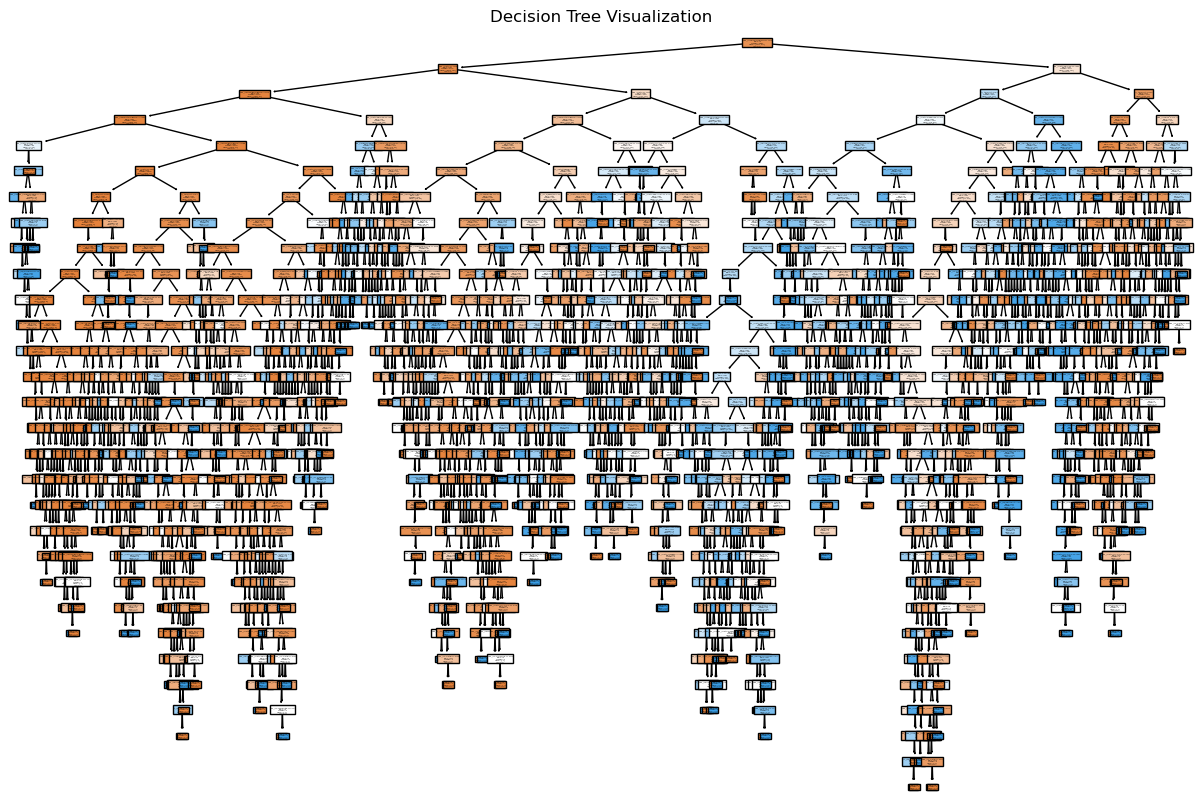

In [20]:
# Extract the fitted decision tree with no maximum depth from the pipeline
dtree = pipe_dtc.named_steps['dtc']

# Get model metrics
depth_1 = dtree.get_depth()
train_acc = pipe_dtc.score(X_train, y_train)
test_acc = pipe_dtc.score(X_test, y_test)

# Print results
print(f'Training Accuracy: {train_acc:.2f}')
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Depth of tree: {depth_1}')

# To visualize the decision tree 
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
feature_names = preprocessor.get_feature_names_out()
tree.plot_tree(dtree, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [35]:
dtree_specs = pd.DataFrame({
    'Model': ['dtree (no max)'],
    'Train Time (ms)': [716],
    'Train Accuracy': [1],
    'Test Accuracy': [0.89]
})
comparison_table = pd.concat([comparison_table,dtree_specs], ignore_index=True)

In [38]:
# DecisionTreeClassifier?

In [39]:
# Simple 5 Node Decision Tree Pipeline
pipe_dtc2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dtc', DecisionTreeClassifier(random_state=42, max_depth=5))
])
%time pipe_dtc2.fit(X_train, y_train)

CPU times: user 304 ms, sys: 10.1 ms, total: 315 ms
Wall time: 314 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Never',
                                                                              '999-and-over',
                                                                              '611-to-998-days',
                                                                              '378-to-610-days',
                                                                              '234-to-377-days',
                                                                              '145-to-233-days',
                                                                              '90-to-144-days',
                                                                              '56-to...
                                                                              '6-to-8-days',
                                                                              '4-to-5-days',
                                                                              '3-days',
                                                                              '2-days',
                                                                              '1-day',
                                                                              'Today']]),
                                                  ['touch_point']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('dtc', DecisionTreeClassifier(max_depth=5, random_state=42))])

Training Accuracy: 0.92
Test Accuracy: 0.91
Depth of tree: 5


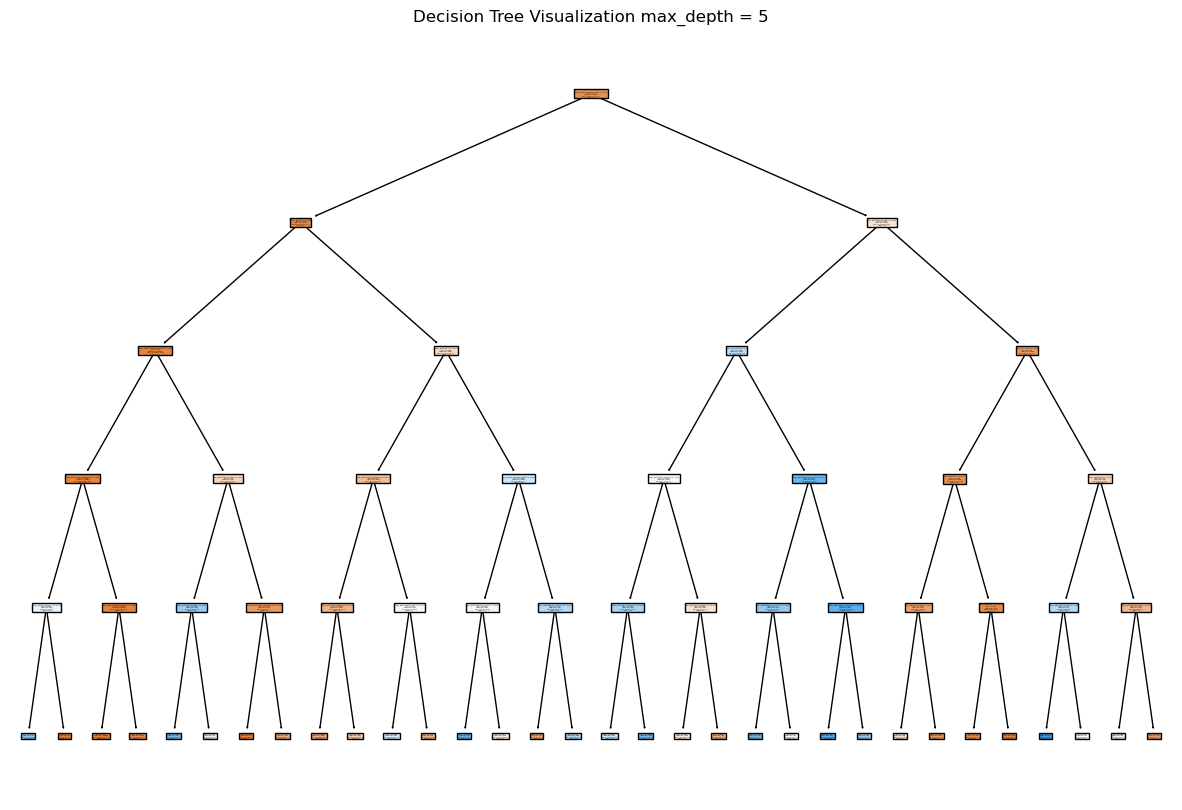

In [69]:
# Extract the fitted decision tree from the pipeline
dtree2 = pipe_dtc2.named_steps['dtc']

# Get model metrics
depth_2 = dtree2.get_depth()
train_acc2 = pipe_dtc2.score(X_train, y_train)
test_acc2 = pipe_dtc2.score(X_test, y_test)

# Print results
print(f'Training Accuracy: {train_acc2:.2f}')
print(f'Test Accuracy: {test_acc2:.2f}')
print(f'Depth of tree: {depth_2}')

# To visualize the decision tree (if desired)
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
feature_names = preprocessor.get_feature_names_out()
tree.plot_tree(dtree2, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization max_depth = 5")
plt.show()

In [36]:
dtree2_specs = pd.DataFrame({
    'Model': ['dtree (5 nodes)'],
    'Train Time (ms)': [314],
    'Train Accuracy': [0.92],
    'Test Accuracy': [0.91]
})
comparison_table = pd.concat([comparison_table,dtree2_specs], ignore_index=True)

In [22]:
# SVC?

In [23]:
# Simple 5 Node Decision Tree Pipeline
pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', SVC())
])
%time pipe_svc.fit(X_train, y_train)

svc_train_score =  pipe_svc.score(X_train, y_train)
svc_test_score = pipe_svc.score(X_test, y_test)

print(f"svc_train_score : {svc_train_score}")
print(f"svc_test_score : {svc_test_score}")

CPU times: user 13.1 s, sys: 300 ms, total: 13.4 s
Wall time: 13.4 s
svc_train_score : 0.9172898255155223
svc_test_score : 0.910556472759056


In [37]:
svc_specs = pd.DataFrame({
    'Model': ['svc'],
    'Train Time (ms)': [13400],
    'Train Accuracy': [0.9173],
    'Test Accuracy': [0.911]
})
comparison_table = pd.concat([comparison_table,svc_specs], ignore_index=True)

#### Comparison Table

In [25]:
# Format the table
styled_table = comparison_table.style.highlight_max(subset=['Test Accuracy'], color='lightgreen')
styled_table = styled_table.format({
    'Train Time (ms)': '{:.2f}',
    'Train Accuracy': '{:.3f}',
    'Test Accuracy': '{:.3f}'
})
styled_table

,Model,Train Time (ms),Train Accuracy,Test Accuracy
0,DummyClassifier,52.40,0.887,0.887
1,LogisticRegression,1200.00,0.914,0.916
2,KNN,71.80,0.547,0.331
3,dtree (5 nodes),314.00,0.920,0.910
4,svc,13400.00,0.917,0.911


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [26]:
y_train.shape[0]

30891

In [88]:
# KNN Pipeline w/ GridSearchCV 

# Create a dictionary of parameters to search
import numpy as np
neighbors_range = np.unique(np.logspace(0, 3, 20, dtype=int))
params = {'knn__n_neighbors': neighbors_range}

# Create GridSearchCV object that will test the models with each k value from the range specified in params
knn_grid = GridSearchCV(pipe_knn, param_grid=params)

# Fit the grid search to the training data
%time knn_grid.fit(X_train, y_train)

# Get the best k value
best_k = knn_grid.best_params_['knn__n_neighbors']

print(best_k)

CPU times: user 8min 21s, sys: 4.39 s, total: 8min 26s
Wall time: 41.3 s
37


In [96]:
knn_grid_train_acc = knn_grid.best_estimator_.score(X_train, y_train)
knn_grid_test_acc = knn_grid.best_estimator_.score(X_test,y_test)
knn_best_params = knn_grid.best_params_


print(f'Training Accuracy: {knn_grid_train_acc: .2f}')
print(f'Trest Accuracy: {knn_grid_test_acc: .2f}')
print(f'Best parameters of KNN: {knn_best_params}')

Training Accuracy:  0.42
Trest Accuracy:  0.41
Best parameters of KNN: {'knn__n_neighbors': 37}


In [38]:
knn2_specs = pd.DataFrame({
    'Model': ['KNN_2'],
    'Train Time (ms)': [41300],
    'Train Accuracy': [0.42],
    'Test Accuracy': [0.41]
})
comparison_table = pd.concat([comparison_table,knn2_specs], ignore_index=True)

In [95]:
### Decision Tree w/ GridSearch

params = {
    'dtc__min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
    'dtc__max_depth': [2, 5, 10],
    'dtc__min_samples_split': [0.1, 0.2, 0.05]
}
%time dtc_grid = GridSearchCV(pipe_dtc, param_grid=params).fit(X_train, y_train)
dtc_grid_train_acc = dtc_grid.best_estimator_.score(X_train, y_train)
dtc_grid_test_acc = dtc_grid.best_estimator_.score(X_test,y_test)
best_params = dtc_grid.best_params_


print(f'Training Accuracy: {dtc_grid_train_acc: .2f}')
print(f'Trest Accuracy: {dtc_grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

CPU times: user 23.1 s, sys: 19.2 ms, total: 23.2 s
Wall time: 23.2 s
Training Accuracy:  0.90
Trest Accuracy:  0.91
Best parameters of tree: {'dtc__max_depth': 2, 'dtc__min_impurity_decrease': 0.01, 'dtc__min_samples_split': 0.1}


In [39]:
dtree_grid_specs = pd.DataFrame({
    'Model': ['dtree_grid'],
    'Train Time (ms)': [23200],
    'Train Accuracy': [0.90],
    'Test Accuracy': [0.91]
})
comparison_table = pd.concat([comparison_table,dtree_grid_specs], ignore_index=True)

In [29]:
### SVC w/ GridSearchCV
params = {
    'svc__kernel': ['rbf', 'linear'],
    'svc__C': [0.1, 1.0, 10.0],       
    'svc__gamma': [0.1, 1.0]
}

# Use 20% of training data for faster parameter search
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

%time svc_grid = GridSearchCV(pipe_svc, param_grid=params).fit(X_sample, y_sample)

CPU times: user 2min 14s, sys: 320 ms, total: 2min 14s
Wall time: 2min 14s


In [30]:
print(f'Training Accuracy: {svc_grid_train_acc: .2f}')
print(f'Test Accuracy: {svc_grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

Training Accuracy:  0.91
Test Accuracy:  0.91
Best parameters of tree: {'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}


In [40]:
svc_grid_specs = pd.DataFrame({
    'Model': ['svc_grid'],
    'Train Time (ms)': [134000],
    'Train Accuracy': [0.91],
    'Test Accuracy': [0.91]
})
comparison_table = pd.concat([comparison_table,svc_grid_specs], ignore_index=True)

#### Comparison Table w/ Additional Models

In [41]:
# Format the table
styled_table = comparison_table.style.highlight_max(subset=['Test Accuracy'], color='lightgreen')
styled_table = styled_table.format({
    'Train Time (ms)': '{:.2f}',
    'Train Accuracy': '{:.3f}',
    'Test Accuracy': '{:.3f}'
})
styled_table

,Model,Train Time (ms),Train Accuracy,Test Accuracy
0,DummyClassifier,52.40,0.887,0.887
1,LogisticRegression,1200.00,0.914,0.916
2,KNN,71.80,0.547,0.331
3,dtree (no max),716.00,1.000,0.890
4,dtree (5 nodes),314.00,0.920,0.910
5,svc,13400.00,0.917,0.911
6,KNN_2,41300.00,0.420,0.410
7,dtree_grid,23200.00,0.900,0.910
8,svc_grid,134000.00,0.910,0.910


#### Comparison Analysis

Based on the above comparisons it is still clear that the LogisticRegression model is the one to beat. We should experiment with additional hyperparameter experimentations on that model, but that might be beyond the scope of this report. For example we could use different degrees for the polynomial features, experiment with different C values or penalties. 

Assuming we stop here, next we can evaluate the confusion matrix, ROC and Lift visualization on our best model to determine the type of business value it can provide.

True Negatives: 8867
False Positives: 270
False Negatives: 599
True Positives: 561
Area Under the Curve: 0.95


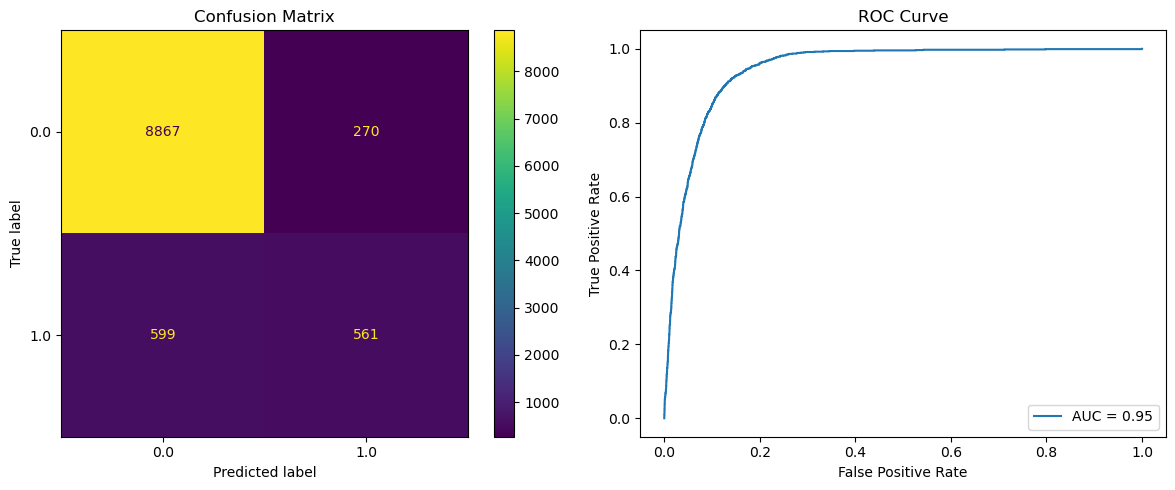

(270, 599, 0.95)

In [49]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Get predictions
y_pred = pipe_lgr.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    pipe_lgr, X_test, y_test, 
    ax=ax[0]
)
ax[0].set_title("Confusion Matrix")

# For the second subplot - ROC curve
y_prob = pipe_lgr.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Round to 2 decimal places
auc = round(roc_auc, 2)
print(f"Area Under the Curve: {auc}")

# Display ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot(ax=ax[1])
ax[1].set_title('ROC Curve')
plt.tight_layout()
plt.show()

### ANSWER CHECK
fp, fn, auc

**Confusion Matrix**: The matrix shows your model's prediction performance broken down into four categories. For a bank marketing campaign, this reveals promising results. You have 8,867 true negatives, meaning customers correctly identified as not interested in subscribing to a term deposit. There are only 270 false positives - customers predicted to subscribe but who didn't. The model incorrectly classified 599 customers as non-subscribers when they would have subscribed (false negatives), while correctly identifying 561 actual subscribers (true positives). For marketing campaigns, false positives are indeed less problematic than false negatives, as you've noted. Missing potential subscribers (false negatives) represents missed opportunities, while contacting someone unlikely to subscribe (false positives) only costs additional outreach.

**ROC Curve**: This graph confirms you have an excellent model with an AUC of 0.95 (anything above 0.9 is typically considered outstanding). The curve shows how your model balances sensitivity (true positive rate) against specificity (1-false positive rate) across different classification thresholds. The steep initial curve indicates the model quickly identifies many true positives before accumulating many false positives, which is ideal for marketing campaigns. The model reaches nearly 80% true positive rate while maintaining a false positive rate below 20%. This means your model effectively prioritizes customers most likely to subscribe, allowing the marketing team to reach most potential subscribers while contacting a relatively small portion of the total customer base.

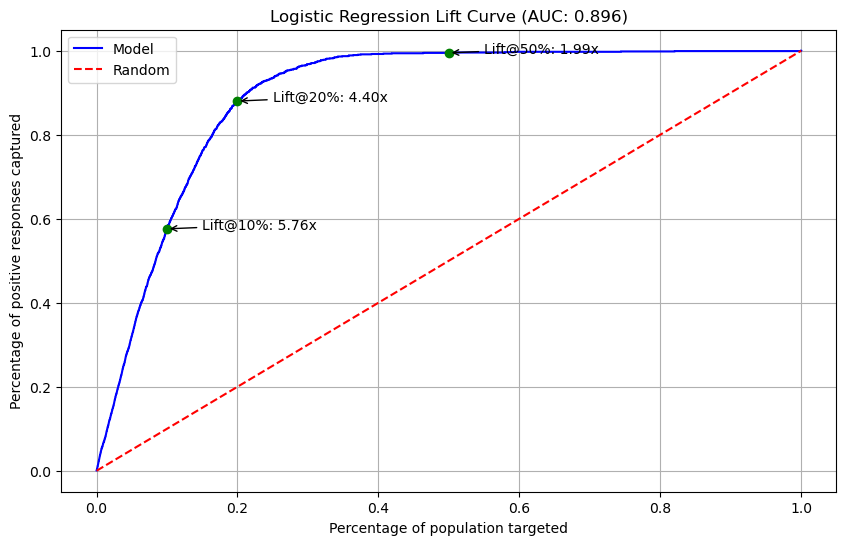

Lift at 10%: 5.76x
Lift at 20%: 4.40x
Lift at 50%: 1.99x


In [53]:
# PLOT LIft Curve for Our Best Model
from sklearn.metrics import roc_curve, auc, classification_report
def plot_lift_curve(model, X, y_true, title='Lift Curve'):
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X)[:, 1]
    else:
        # For models that don't have predict_proba
        y_score = model.decision_function(X) if hasattr(model, 'decision_function') else model.predict(X)
    
    # Convert to numpy arrays to avoid pandas indexing issues
    if hasattr(y_true, 'values'):
        y_true = y_true.values
    y_score = np.array(y_score)
    
    # Sort by probability
    indices = np.argsort(y_score)[::-1]
    y_true_sorted = y_true[indices]
    
    # Calculate cumulative gains
    population = len(y_true)
    target_population = np.sum(y_true)
    
    gains = np.cumsum(y_true_sorted) / target_population
    percentages = np.arange(1, population + 1) / population
    
    # Calculate the area under the lift curve
    lift_auc = np.trapz(gains, percentages)
    
    # Random model for comparison
    random_model = percentages
    
    plt.figure(figsize=(10, 6))
    plt.plot(percentages, gains, 'b-', label='Model')
    plt.plot(percentages, random_model, 'r--', label='Random')
    
    # Calculate lift at 10%, 20% and 50%
    decile_lift = {}
    for p in [0.1, 0.2, 0.5]:
        idx = min(int(p * population) - 1, len(gains) - 1)  # Ensure index is within bounds
        lift_value = gains[idx] / p
        decile_lift[p] = lift_value
        plt.plot([p], [gains[idx]], 'go')
        plt.annotate(f'Lift@{int(p*100)}%: {lift_value:.2f}x', 
                     xy=(p, gains[idx]), 
                     xytext=(p+0.05, gains[idx]),
                     arrowprops=dict(arrowstyle="->"))
    
    plt.grid(True)
    plt.xlabel('Percentage of population targeted')
    plt.ylabel('Percentage of positive responses captured')
    plt.title(f'{title} (AUC: {lift_auc:.3f})')
    plt.legend()
    plt.show()
    
    return lift_auc, decile_lift


# Example for one of your models (e.g., dtc_grid.best_estimator_)
model = pipe_lgr  

# Compute and plot lift curve
lift_auc, decile_lift = plot_lift_curve(model, X_test, y_test, title="Logistic Regression Lift Curve")

print(f"Lift at 10%: {decile_lift[0.1]:.2f}x")
print(f"Lift at 20%: {decile_lift[0.2]:.2f}x")
print(f"Lift at 50%: {decile_lift[0.5]:.2f}x")

**Lift Curve**: The lift curve provides a clear business-focused visualization of your model's potential return on investment for the bank's marketing campaign. The blue line shows how effectively your model captures potential subscribers compared to a random selection approach (red dotted line). At just 10% of the customer base targeted, your model captures approximately 57% of all potential subscribers - a lift of 5.76x over random selection. This means the bank would need to contact only 10% of customers to reach over half of those who would subscribe to the term deposit. At 20% of customers targeted, the model achieves a 4.40x lift, capturing roughly 88% of all subscribers. Even at 50% targeting, the model maintains nearly double the efficiency of random selection. The area under the lift curve (0.896) confirms the model's strong overall performance.

###  Marketing Efficiency to Optimize Return on Investment

This lift visualization directly translates to marketing efficiency and cost savings. For bank executives, the 5.76x lift at 10% targeting represents a concrete business value proposition - the bank can achieve nearly 60% of potential revenue while reducing marketing costs by 90% compared to contacting everyone. This means significantly lower operational expenses (fewer calls, less agent time), reduced customer intrusion (fewer unnecessary contacts), and higher conversion rates (focusing on the most promising prospects). The lift metric effectively communicates ROI in terms decision-makers can immediately grasp: "contact these specific customers first and you'll get 5.76 times the results with the same effort."

## Conclusion

Our comprehensive analysis demonstrates that the Logistic Regression model with our carefully engineered features performed exceptionally well, achieving 91.6% accuracy on the test dataset. Most impressively, the model delivers a 5.76x lift when targeting just the top 10% of customers – meaning the bank could reach nearly 60% of potential subscribers while contacting only a small fraction of their customer base. This represents substantial efficiency gains for the bank's marketing campaigns.

While further model refinements are possible through hyperparameter tuning, we recommend a balanced approach that considers the entire analytics-to-action pipeline. The current model already provides significant business value, allowing the bank to immediately implement a more targeted marketing strategy. We suggest a two-phase approach: first, deploy the current model to begin realizing these efficiency gains, while simultaneously conducting focused hyperparameter optimization on the most promising models (particularly SVM and ensemble methods) to potentially achieve incremental improvements.

Additionally, we recommend integrating the model findings with the bank's operational systems to create a comprehensive campaign management solution that not only predicts which customers to target but also determines optimal contact timing and personalized messaging based on the key features identified in our analysis, such as previous contact history and economic indicators. This holistic approach will maximize the return on investment for the bank's marketing efforts while improving the customer experience.

##### Questions